In [54]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline

In [55]:
np.random.seed(42)

# Portfolio Planner

In this activity, you will use the iexfinance api to grab historical data for a 60/40 portfolio using `SPY` to represent the stock portion and `AGG` to represent the bonds.

In [56]:
from iexfinance.stocks import get_historical_data
import iexfinance as iex
from iexfinance.refdata import get_symbols

In [57]:
tickers = pd.DataFrame(get_symbols())
tickers.head()

,symbol,exchange,name,date,type,iexId,region,currency,isEnabled
0,A,NYS,Agilent Technologies Inc.,2020-01-21,cs,IEX_46574843354B2D52,US,USD,True
1,AA,NYS,Alcoa Corp.,2020-01-21,cs,IEX_4238333734532D52,US,USD,True
2,AAAU,PSE,Perth Mint Physical Gold ETF,2020-01-21,et,IEX_474B433136332D52,US,USD,True
3,AACG,NAS,ATA Creativity Global Sponsored ADR,2020-01-21,ad,IEX_44595A4C53392D52,US,USD,True
4,AADR,PSE,AdvisorShares Dorsey Wright ADR ETF,2020-01-21,et,IEX_5253355435362D52,US,USD,True


In [58]:
tickers.type.drop_duplicates()

0           cs
2           et
3           ad
31          ps
41          ut
42          wt
68         cef
162         rt
1272    struct
Name: type, dtype: object

In [59]:
tickers.head()

,symbol,exchange,name,date,type,iexId,region,currency,isEnabled
0,A,NYS,Agilent Technologies Inc.,2020-01-21,cs,IEX_46574843354B2D52,US,USD,True
1,AA,NYS,Alcoa Corp.,2020-01-21,cs,IEX_4238333734532D52,US,USD,True
2,AAAU,PSE,Perth Mint Physical Gold ETF,2020-01-21,et,IEX_474B433136332D52,US,USD,True
3,AACG,NAS,ATA Creativity Global Sponsored ADR,2020-01-21,ad,IEX_44595A4C53392D52,US,USD,True
4,AADR,PSE,AdvisorShares Dorsey Wright ADR ETF,2020-01-21,et,IEX_5253355435362D52,US,USD,True


# Data Collection

In this step, you will need to use the IEX api to fetch closing prices for the `SPY` and `AGG` tickers. Save the results as a pandas DataFrame

In [60]:
list_of_tickers = ["SPY", "AGG"]
end = datetime.now()
start = end - timedelta(361)

IEXcloud_csv = Path("../Resources/IEXCLOUD_data.csv")
df = pd.read_csv(IEXcloud_csv, index_col="date", infer_datetime_format=True, parse_dates=True)
df = df.sort_index()
df.head()

,SPY,AGG
date,,
2019-01-22,262.86,106.44
2019-01-23,263.41,106.55
2019-01-24,263.55,106.73
2019-01-25,265.78,106.68
2019-01-28,263.76,106.62


In [61]:
type(datetime.now())

datetime.datetime

In [62]:
df.head()

,SPY,AGG
date,,
2019-01-22,262.86,106.44
2019-01-23,263.41,106.55
2019-01-24,263.55,106.73
2019-01-25,265.78,106.68
2019-01-28,263.76,106.62


# Monte Carlo Simulation

In this step, you will run Monte Carlo Simulations for your portfolio to model portfolio performance at different retirement ages. 

Complete the following steps:
1. Calculate the daily returns for the SPY and AGG closing prices.
2. Calculate volatility for both the SPY and AGG closing prices.
3. Find the last day's closing price for both stocks and save those as variables.
4. Run a Monte Carlo Simulation of at least 500 iterations and generate at least 30 years of closing prices

### HINTS:
There are 252 trading days per year, so the number of records to generate for each Monte Carlo run will be 252 days * 30 years

In [63]:
# Calculate the daily roi for the stocks
daily_returns = df.pct_change()
daily_returns.head()

,SPY,AGG
date,,
2019-01-22,NaN,NaN
2019-01-23,0.002092,0.001033
2019-01-24,0.000531,0.001689
2019-01-25,0.008461,-0.000468
2019-01-28,-0.007600,-0.000562


In [64]:
# Calculate volatility = standard deviation
daily_volatility = daily_returns.std()

In [65]:
spy_volatility = daily_volatility['SPY']
agg_volatility = daily_volatility['AGG']

In [66]:
avg_daily_return_spy = daily_returns.mean()['SPY']
avg_daily_return_agg = daily_returns.mean()['AGG']
avg_daily_return_spy

0.0009612642291769476

In [67]:
# Save the last day's closing price
spy_last_price = df['SPY'][-1]
agg_last_price = df['AGG'][-1]

In [68]:
# Setup the Monte Carlo Parameters
number_simulations = 500
number_records = 252 * 30
monte_carlo = pd.DataFrame()
simulated_price_df = pd.DataFrame()

In [69]:
# Run the Monte Carlo Simulation
for x in range(number_simulations):
    
    
    # Initialize the simulated prices list with the last closing price of `TSLA` and `SPHD`
    spy_prices = [spy_last_price]
    agg_prices = [agg_last_price]
    
    # Simulate the returns for 252 * 3 days
    for i in range(number_records):
        
        # Calculate the simulated price using the last price within the list
        spy_prices_value = spy_prices[-1] * (1 + np.random.normal(avg_daily_return_spy, spy_volatility))
        agg_prices_value = agg_prices[-1] * (1 + np.random.normal(avg_daily_return_agg, agg_volatility))
        
        # Append the simulated price to the list
        spy_prices.append(spy_prices_value)
        agg_prices.append(agg_prices_value)
    
    # Append a simulated prices of each simulation to DataFrame
    simulated_price_df["SPY prices"] = pd.Series(spy_prices)
    simulated_price_df["AGG prices"] = pd.Series(agg_prices)
    
    # Calculate the daily returns of simulated prices
    simulated_daily_returns = simulated_price_df.pct_change()
    
    # Set the portfolio weights (60, 40)
    weights = [0.60, 0.40]

    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    portfolio_daily_returns = simulated_daily_returns.dot(weights)
    
    # Calculate the normalized, cumulative return series
    monte_carlo[x] = (1 + portfolio_daily_returns.fillna(0)).cumprod()

# Print records from the DataFrame
monte_carlo.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002765,0.996222,0.993929,0.999896,1.005468,1.006505,1.008854,0.996870,1.001856,0.999339,...,1.002160,0.996121,1.006918,1.000176,0.997978,1.003057,0.996650,0.994530,1.003012,0.997636
2,1.007598,1.000038,0.993478,0.999056,1.008655,0.998236,1.003838,0.987116,1.001268,1.007326,...,1.004317,1.003128,1.009988,1.001913,0.999475,1.000177,0.996370,0.995111,1.003086,1.001348
3,1.007033,1.000251,0.996933,0.993854,1.008206,1.001209,1.007665,0.981654,1.001242,1.015214,...,1.004537,1.005779,1.014524,1.003520,0.993478,0.999223,1.000070,1.000454,1.006429,1.000479
4,1.015419,1.003153,0.993831,0.999488,1.009844,0.996768,1.006748,0.979196,1.008793,1.006011,...,1.006454,1.004336,1.013382,1.008449,0.999416,0.996601,0.994983,1.001323,1.010826,1.003931


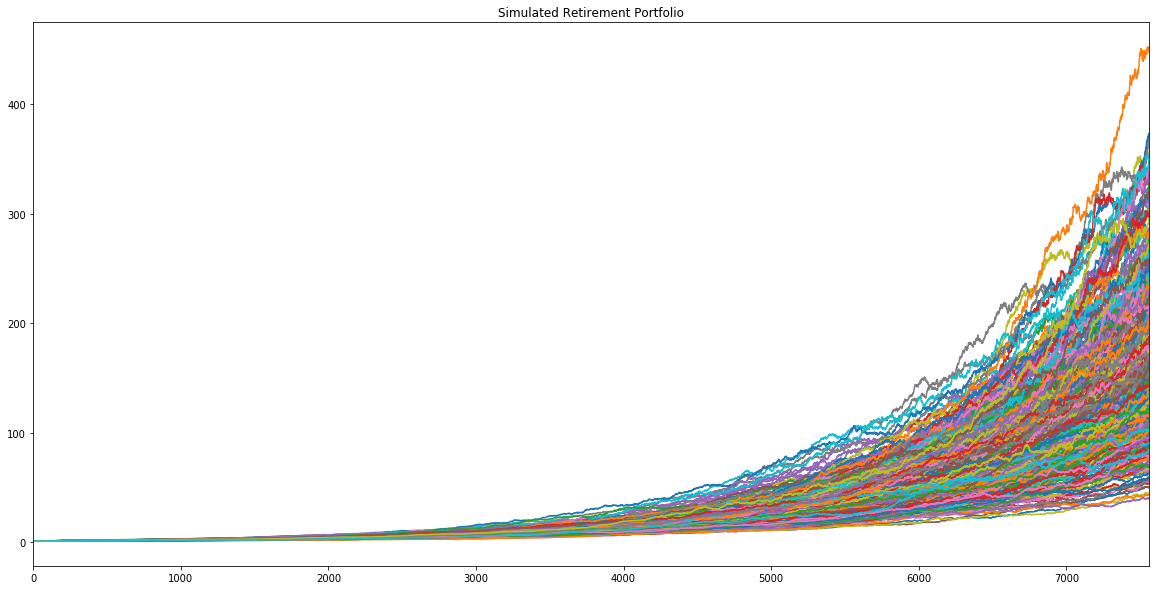

In [94]:
# Visualize the Simulation
monte_carlo.plot(legend=None, title="Simulated Retirement Portfolio", figsize=(20,10))

In [71]:
#ending_returnsct the last row for the cumulative returns (cumulative returns at 30 years)
ending_returns = monte_carlo.iloc[-1, :]

In [72]:
# Select the last row for the cumulative returns (cumulative returns at 20 years)
ending_returns = monte_carlo.tail(1).T
ending_returns.head()

,7560
0,172.632754
1,143.860225
2,193.515796
3,202.454611
4,185.436230


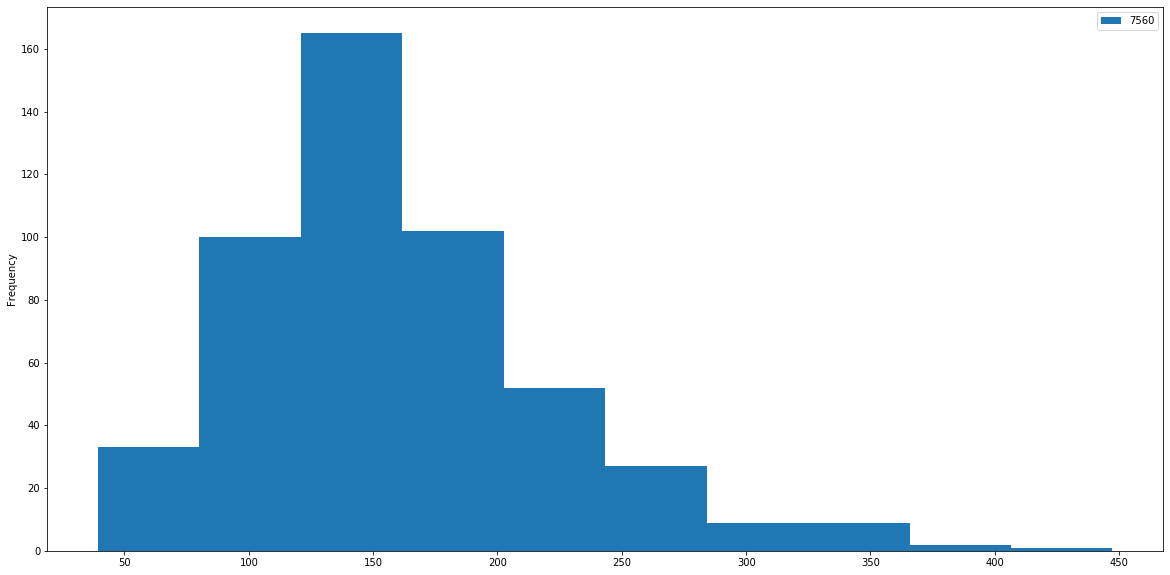

In [92]:
ending_returns.plot(kind='hist', bins=10, figsize=(20,10))

In [74]:
# Display the 90% confidence interval for the ending returns
confidence_interval = ending_returns.quantile(q=[0.05, 0.95])
confidence_interval

,7560
0.05,75.651312
0.95,280.071048


<Figure size 432x288 with 0 Axes>

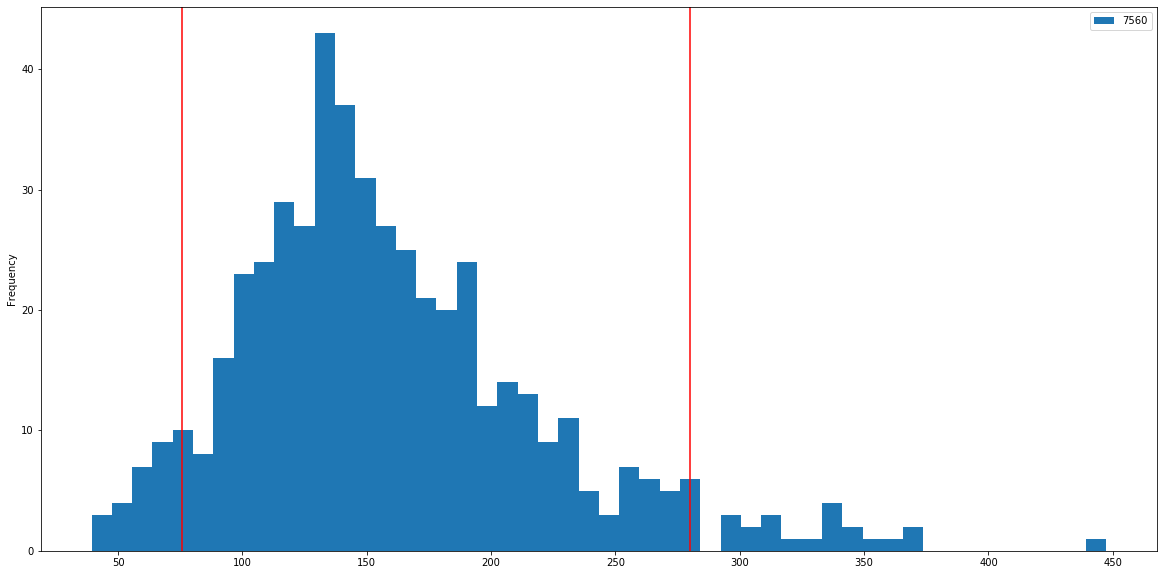

In [93]:
# Visualize the distribution of the ending returns
plt.figure();
ending_returns.plot.hist(bins=50, figsize=(20,10))
plt.axvline(confidence_interval.iloc[0, 0], color='r')
plt.axvline(confidence_interval.iloc[1, 0], color='r')

---

# Retirement Analysis

In this section, you will use the monte carlo model to answer the following retirement planning questions:

1. What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?
2. Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?
3. Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?
4. How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

### What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?

In [96]:
expected_cumulative_10_90 = ending_returns.quantile(q=[0.1, 0.9])
expected_cumulative_50_50 = ending_returns.quantile(q=[0.5, 0.5])
ending_returns.quantile([.01, .5, .9])

,7560
0.01,53.300914
0.50,147.042900
0.90,237.622657


### Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?

In [104]:
initial_investment = 20000 
initial_investment * ending_returns.quantile([.01, .5, .9])

,7560
0.01,1.066018e+06
0.50,2.940858e+06
0.90,4.752453e+06


### Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?

Note: This is effectively saying that 90% of the expected returns will be greater than the return at the 10th percentile, so this can help measure the uncertainty about having enough funds at retirement

In [98]:
plaid_projected_annual_income =  7389

# Calculate the 4% withdrawal for the ending return as retirement income
retirement_income = .04 * (initial_investment * ending_returns.quantile(.1)).iloc[0]

# Determine if the retirement income meets or exceeds the current projected income
if retirement_income >= plaid_projected_annual_income:
    print(f"You will have ${retirement_income:.2f} in retirement income which is sufficient")
else:
    print(f"You will have ${retirement_income:.2f} in retirement income which is not sufficient")

You will have $74306.04 in retirement income which is sufficient


### How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

In [99]:
# Re-calculate the retirement income with a 50% increase in the initial investment amount
.04 * (1.5 * initial_investment * ending_returns.quantile(.1)).iloc[0]

111459.06496738503

## Conclusion :

The expected cumulative returns at 30 years for the 10th is $53.30, 50th is $147.04, and 90th percentiles is $237.62

4% of retirement portfolio at the 10th percentile is $74306.043

Current Projected annual income is $7389

With a 50% increase the retirement income woud be $111459.06


### Optional Challenge

In this section, you will calculate and plot the cumulative returns for the median and 90% confidence intervals. This plot shows the expected cumulative returns for any given day between the first day and the last day of investment. 

In [ ]:
# YOUR CODE HERE